# National Results of the 2024 Eighth-Grade Exam: Powiat Division

Author: **Marcin Sikorski**<br>
Date: July, 2024

**Introduction**<br>
This notebook visualizes the latest national results of the eighth-grade exam published in July 2024 by CKE (Central Examination Board) for Poland. The final plots will display exam results for each **powiat** - second-level unit of local government and administration. We will focus only on mandatory subjects: mathematics, Polish, and English.

**Data sources:**
* [administrative boundaries](https://gis-support.pl/baza-wiedzy-2/dane-do-pobrania/granice-administracyjne/)
* [2024 exam results](https://cke.gov.pl/egzamin-osmoklasisty/wyniki/)
* [map](https://mapa.wyniki.edu.pl/MapaEgzaminow/)

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

### 1. Loading Geometry Data

The spatial data for Polish powiats are stored in a local directory.

In [2]:
from os import getcwd

# load SHP file
cols = ['JPT_KOD_JE', 'JPT_NAZWA_', 'geometry']

gdf = gpd.read_file(getcwd() + '\powiaty\powiaty.shp')
gdf = gdf[cols]

gdf.tail(10)

,JPT_KOD_JE,JPT_NAZWA_,geometry
370,2611,powiat starachowicki,"POLYGON ((639988.207 352079.323, 639986.460 35..."
371,2605,powiat konecki,"POLYGON ((578016.191 369915.255, 578025.617 36..."
372,2811,powiat nidzicki,"POLYGON ((594201.681 595254.681, 594094.931 59..."
373,2812,powiat nowomiejski,"POLYGON ((544284.176 621462.669, 544291.304 62..."
374,2472,powiat Ruda Śląska,"POLYGON ((490640.526 260143.452, 490635.610 26..."
375,3201,powiat białogardzki,"POLYGON ((315199.533 689953.379, 315196.517 68..."
376,2463,powiat Chorzów,"POLYGON ((496873.856 263549.381, 496859.841 26..."
377,0265,powiat Wałbrzych,"POLYGON ((306923.077 320137.265, 306913.670 32..."
378,1203,powiat chrzanowski,"POLYGON ((537088.752 239587.792, 537082.924 23..."
379,1013,powiat rawski,"POLYGON ((588732.713 424569.991, 588733.478 42..."


In [3]:
# trim leading zeros in TERYT codes
gdf['JPT_KOD_JE'] = gdf['JPT_KOD_JE'].str.lstrip('0')

gdf.tail(10)

,JPT_KOD_JE,JPT_NAZWA_,geometry
370,2611,powiat starachowicki,"POLYGON ((639988.207 352079.323, 639986.460 35..."
371,2605,powiat konecki,"POLYGON ((578016.191 369915.255, 578025.617 36..."
372,2811,powiat nidzicki,"POLYGON ((594201.681 595254.681, 594094.931 59..."
373,2812,powiat nowomiejski,"POLYGON ((544284.176 621462.669, 544291.304 62..."
374,2472,powiat Ruda Śląska,"POLYGON ((490640.526 260143.452, 490635.610 26..."
375,3201,powiat białogardzki,"POLYGON ((315199.533 689953.379, 315196.517 68..."
376,2463,powiat Chorzów,"POLYGON ((496873.856 263549.381, 496859.841 26..."
377,265,powiat Wałbrzych,"POLYGON ((306923.077 320137.265, 306913.670 32..."
378,1203,powiat chrzanowski,"POLYGON ((537088.752 239587.792, 537082.924 23..."
379,1013,powiat rawski,"POLYGON ((588732.713 424569.991, 588733.478 42..."


In [4]:
# check data types
gdf.dtypes

JPT_KOD_JE      object
JPT_NAZWA_      object
geometry      geometry
dtype: object

In [5]:
# check projection
gdf.crs

<Projected CRS: EPSG:2180>
Name: ETRF2000-PL / CS92
Axis Info [cartesian]:
- x[north]: Northing (metre)
- y[east]: Easting (metre)
Area of Use:
- name: Poland - onshore and offshore.
- bounds: (14.14, 49.0, 24.15, 55.93)
Coordinate Operation:
- name: Poland CS92
- method: Transverse Mercator
Datum: ETRF2000 Poland
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### 2. Loading Exam Results For Powiats

We will take incount only the mean results - `wynik średni (%)`.

In [6]:
# pip install openpyxl

df = pd.read_excel('E8 - powiaty (aktualizacja 07.2024).xlsx', sheet_name='SAS', header=[0, 1])
df = df.reset_index()
df = df.rename(columns=lambda x: x if not 'Unnamed' in str(x) else '')
df = df.rename(columns={'index': 'col_a'})
df.columns.names = (None, None)

df.head(10)

col_a                                                                     
        ID OKE województwo - nazwa       powiat - nazwa Kod teryt powiatu   
0     0      1  Kujawsko-Pomorskie       Aleksandrowski               401  \
1     1      1  Kujawsko-Pomorskie            Brodnicki               402   
2     2      1  Kujawsko-Pomorskie             Bydgoski               403   
3     3      1  Kujawsko-Pomorskie            Bydgoszcz               461   
4     4      1  Kujawsko-Pomorskie           Chełmiński               404   
5     5      1  Kujawsko-Pomorskie  Golubsko-Dobrzyński               405   
6     6      1  Kujawsko-Pomorskie            Grudziądz               462   
7     7      1  Kujawsko-Pomorskie          Grudziądzki               406   
8     8      1  Kujawsko-Pomorskie        Inowrocławski               407   
9     9      1  Kujawsko-Pomorskie            Lipnowski               408   

      język polski                                                           
  liczba zdających wynik średni (%) odchylenie standardowe (%) mediana (%)   
0              293        56.354949                  20.017662        60.0  \
1              447        54.519016                  19.770925        58.0   
2              648        60.850309                  19.096509        62.0   
3             1382        60.594790                  21.574880        64.0   
4              255        53.462745                  19.281546        56.0   
5              251        57.107570                  19.604871        60.0   
6              423        51.947991                  22.996086        56.0   
7              228        57.307018                  17.605386        60.0   
8              608        60.652961                  20.439729        62.0   
9              386        55.461140                  19.203702        58.0   

               ...   język rosyjski                    
  modalna (%)  ... liczba zdających wynik średni (%)   
0          60  ...              NaN              NaN  \
1          67  ...             12.0        24.916667   
2          76  ...              9.0        75.666667   
3          71  ...             15.0        91.733333   
4          64  ...              NaN              NaN   
5          58  ...              NaN              NaN   
6          60  ...              3.0              NaN   
7          64  ...              NaN              NaN   
8          71  ...              2.0              NaN   
9          69  ...              NaN              NaN   

                                                         język włoski   
  odchylenie standardowe (%) mediana (%) modalna (%) liczba zdających   
0                        NaN         NaN         NaN              NaN  \
1                  21.608094        18.0        18.0              NaN   
2                  17.524586        71.0        58.0              NaN   
3                   7.637335        95.0        98.0              NaN   
4                        NaN         NaN         NaN              NaN   
5                        NaN         NaN         NaN              NaN   
6                        NaN         NaN         NaN              NaN   
7                        NaN         NaN         NaN              NaN   
8                        NaN         NaN         NaN              NaN   
9                        NaN         NaN         NaN              NaN   

                                                                       
  wynik średni (%) odchylenie standardowe (%) mediana (%) modalna (%)  
0              NaN                        NaN         NaN         NaN  
1              NaN                        NaN         NaN         NaN  
2              NaN                        NaN         NaN         NaN  
3              NaN                        NaN         NaN         NaN  
4              NaN                        NaN         NaN         NaN  
5              NaN                        NaN         NaN         NaN  
6             

In [7]:
# leave only mandatory subjects - exclude modern languages
jezyki = ['język francuski', 'język hiszpański', 'język niemiecki', 'język rosyjski', 'język włoski']
df = df.drop(jezyki, axis=1, level=0)

df.head(10)

col_a                                                                     
        ID OKE województwo - nazwa       powiat - nazwa Kod teryt powiatu   
0     0      1  Kujawsko-Pomorskie       Aleksandrowski               401  \
1     1      1  Kujawsko-Pomorskie            Brodnicki               402   
2     2      1  Kujawsko-Pomorskie             Bydgoski               403   
3     3      1  Kujawsko-Pomorskie            Bydgoszcz               461   
4     4      1  Kujawsko-Pomorskie           Chełmiński               404   
5     5      1  Kujawsko-Pomorskie  Golubsko-Dobrzyński               405   
6     6      1  Kujawsko-Pomorskie            Grudziądz               462   
7     7      1  Kujawsko-Pomorskie          Grudziądzki               406   
8     8      1  Kujawsko-Pomorskie        Inowrocławski               407   
9     9      1  Kujawsko-Pomorskie            Lipnowski               408   

      język polski                                                           
  liczba zdających wynik średni (%) odchylenie standardowe (%) mediana (%)   
0              293        56.354949                  20.017662        60.0  \
1              447        54.519016                  19.770925        58.0   
2              648        60.850309                  19.096509        62.0   
3             1382        60.594790                  21.574880        64.0   
4              255        53.462745                  19.281546        56.0   
5              251        57.107570                  19.604871        60.0   
6              423        51.947991                  22.996086        56.0   
7              228        57.307018                  17.605386        60.0   
8              608        60.652961                  20.439729        62.0   
9              386        55.461140                  19.203702        58.0   

                    matematyka                                               
  modalna (%) liczba zdających wynik średni (%) odchylenie standardowe (%)   
0          60              293        42.170648                  27.206420  \
1          67              447        43.463087                  27.230688   
2          76              648        51.870370                  27.760136   
3          71             1384        51.826590                  29.435812   
4          64              255        43.874510                  24.910505   
5          58              251        41.482072                  25.544639   
6          60              422        36.037915                  24.859768   
7          64              228        43.263158                  25.036483   
8          71              608        43.723684                  27.249867   
9          69              386        38.704663                  23.552407   

                           język angielski                    
  mediana (%) modalna (%) liczba zdających wynik średni (%)   
0          32          20              287        60.958188  \
1          36          16              435        55.262069   
2          48          20              642        68.760125   
3          48          24             1459        69.535984   
4          40          24              253        58.300395   
5          36          32              249        56.947791   
6          28          20              427        54.210773   
7          36          20              202        55.707921   
8          36          20              613        61.274062   
9          32          28              382        52.117801   

                                                      
  odchylenie standardowe (%) mediana (%) modalna (%)  
0                  30.203808        62.0         100  
1                  30.083261        51.0          98  
2                  30.071800        82.0         100  
3                  29.910500        82.0          98  
4                  31.070821        56.0          95  
5                  30.694002        53.0          24  
6     

In [8]:
# check data types
df.dtypes

col_a                                            int64
                 ID OKE                          int64
                 województwo - nazwa            object
                 powiat - nazwa                 object
                 Kod teryt powiatu               int64
język polski     liczba zdających                int64
                 wynik średni (%)              float64
                 odchylenie standardowe (%)    float64
                 mediana (%)                   float64
                 modalna (%)                     int64
matematyka       liczba zdających                int64
                 wynik średni (%)              float64
                 odchylenie standardowe (%)    float64
                 mediana (%)                     int64
                 modalna (%)                     int64
język angielski  liczba zdających                int64
                 wynik średni (%)              float64
                 odchylenie standardowe (%)    float64
          

In [9]:
# convert int64 to object for TERYT code
df[[('', 'Kod teryt powiatu')]] = df[[('', 'Kod teryt powiatu')]].astype(str)

In [10]:
# display subject by level 0 index
df[['matematyka']].head()

matematyka                                                           
  liczba zdających wynik średni (%) odchylenie standardowe (%) mediana (%)   
0              293        42.170648                  27.206420          32  \
1              447        43.463087                  27.230688          36   
2              648        51.870370                  27.760136          48   
3             1384        51.826590                  29.435812          48   
4              255        43.874510                  24.910505          40   

               
  modalna (%)  
0          20  
1          16  
2          20  
3          24  
4          24

In [11]:
# check example for concatenating TERYT and results
pd.concat([df[[('', 'Kod teryt powiatu')]], df[[('matematyka', 'wynik średni (%)')]]], axis=1)

,,matematyka
,Kod teryt powiatu,wynik średni (%)
0,401,42.170648
1,402,43.463087
2,403,51.870370
3,461,51.826590
4,404,43.874510
...,...,...
375,1608,40.960000
376,1661,60.525822
377,1609,51.327354


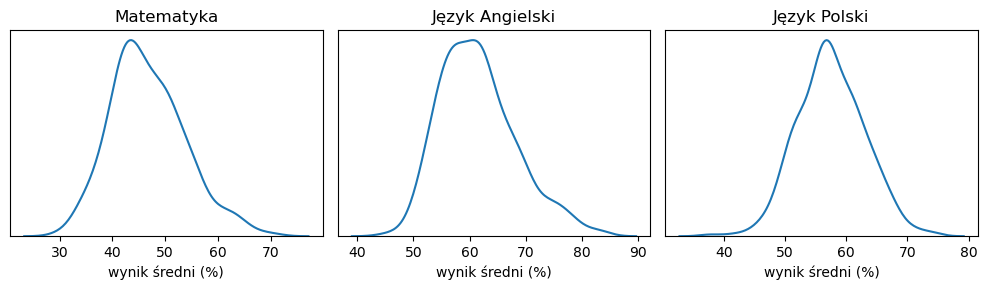

In [12]:
from seaborn import kdeplot

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

axes[0].set_title('Matematyka')
axes[0].set_xlabel('wynik średni (%)')
axes[0].set_yticklabels([])
axes[0].set_yticks([])
kdeplot(x=('matematyka', 'wynik średni (%)'), data=df, ax=axes[0])

axes[1].set_title('Język Angielski')
axes[1].set_xlabel('wynik średni (%)')
axes[1].set_yticklabels([])
axes[1].set_yticks([])
kdeplot(x=('język angielski', 'wynik średni (%)'), data=df, ax=axes[1])

axes[2].set_title('Język Polski')
axes[2].set_xlabel('wynik średni (%)')
axes[2].set_yticklabels([])
axes[2].set_yticks([])
kdeplot(x=('język polski', 'wynik średni (%)'), data=df, ax=axes[2])

plt.tight_layout()
plt.show()

### 3. Combining Datasets & Plotting Exam Results

Each mandatory exam subject will have an individual dataframe. We will perform a left-join for each of them to combine polygon data and the exam results.

In [13]:
# concat and remove multi-index
jez_pol = pd.concat([df[[('', 'Kod teryt powiatu')]],
                     df[[('język polski', 'wynik średni (%)')]]], axis=1).droplevel(0, axis=1)

jez_ang = pd.concat([df[[('', 'Kod teryt powiatu')]],
                     df[[('język angielski', 'wynik średni (%)')]]], axis=1).droplevel(0, axis=1)

matematyka = pd.concat([df[[('', 'Kod teryt powiatu')]],
                        df[[('matematyka', 'wynik średni (%)')]]], axis=1).droplevel(0, axis=1)

# left-join example
gdf.merge(matematyka, left_on='JPT_KOD_JE', right_on='Kod teryt powiatu', how='left')

,JPT_KOD_JE,JPT_NAZWA_,geometry,Kod teryt powiatu,wynik średni (%)
0,1807,powiat krośnieński,"POLYGON ((689863.285 218885.536, 689862.128 21...",1807,52.146912
1,2804,powiat elbląski,"POLYGON ((551842.165 693417.652, 551870.912 69...",2804,39.343511
2,1415,powiat ostrołęcki,"POLYGON ((646230.458 617154.258, 646336.602 61...",1415,43.399610
3,413,powiat sępoleński,"POLYGON ((384997.245 615178.269, 385170.687 61...",413,40.347826
4,3019,powiat pilski,"POLYGON ((342585.530 579834.380, 342632.859 57...",3019,44.107595
...,...,...,...,...,...
375,3201,powiat białogardzki,"POLYGON ((315199.533 689953.379, 315196.517 68...",3201,29.723077
376,2463,powiat Chorzów,"POLYGON ((496873.856 263549.381, 496859.841 26...",2463,46.613108
377,265,powiat Wałbrzych,"POLYGON ((306923.077 320137.265, 306913.670 32...",265,38.537143
378,1203,powiat chrzanowski,"POLYGON ((537088.752 239587.792, 537082.924 23...",1203,50.450704


In [14]:
# new dataframes including powiat geometry and exam results
gdf_pol = gdf.merge(jez_pol, left_on='JPT_KOD_JE', right_on='Kod teryt powiatu', how='left')

gdf_ang = gdf.merge(jez_ang, left_on='JPT_KOD_JE', right_on='Kod teryt powiatu', how='left')

gdf_mat = gdf.merge(matematyka, left_on='JPT_KOD_JE', right_on='Kod teryt powiatu', how='left')

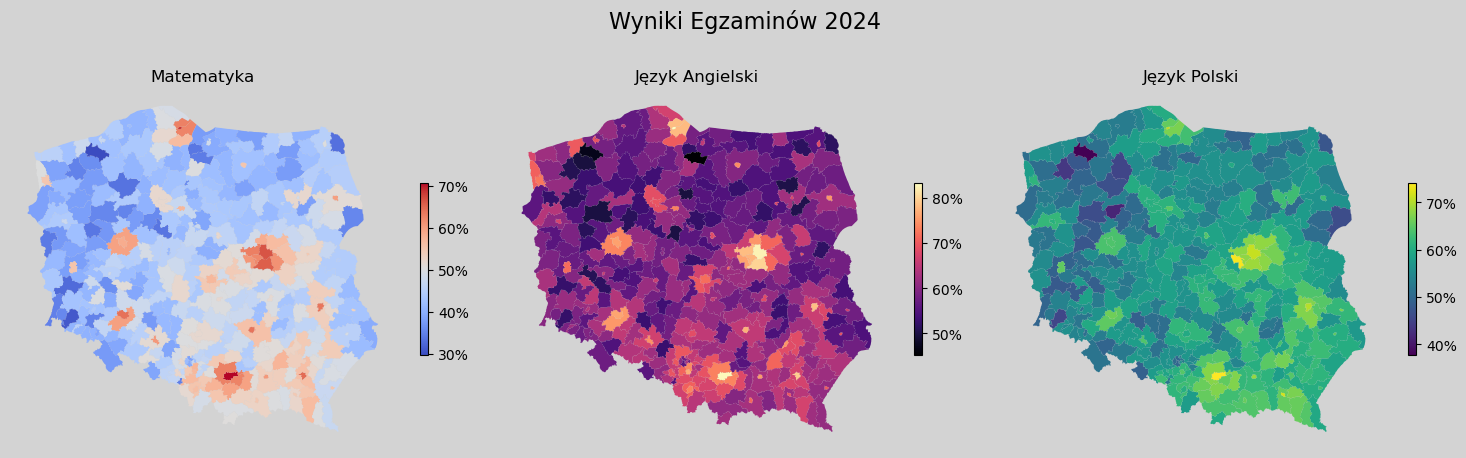

In [15]:
fig, axes = plt.subplots(1, 3, facecolor='lightgray', figsize=(15, 5))
fig.suptitle('Wyniki Egzaminów 2024', size=16)

legend_props = {'shrink': 0.4, 'aspect': 20, 'format': '{x:.0f}%'}

axes[0].set_title('Matematyka')
axes[0].axis('off')
gdf_mat.plot(ax=axes[0], column='wynik średni (%)', cmap='coolwarm', legend=True, legend_kwds=legend_props)

axes[1].set_title('Język Angielski')
axes[1].axis('off')
gdf_ang.plot(ax=axes[1], column='wynik średni (%)', cmap='magma', legend=True, legend_kwds=legend_props)

axes[2].set_title('Język Polski')
axes[2].axis('off')
gdf_pol.plot(ax=axes[2], column='wynik średni (%)', cmap='viridis', legend=True, legend_kwds=legend_props)

plt.tight_layout()

#plt.savefig('exam_results_map.png', dpi=600, bbox_inches='tight')

plt.show()

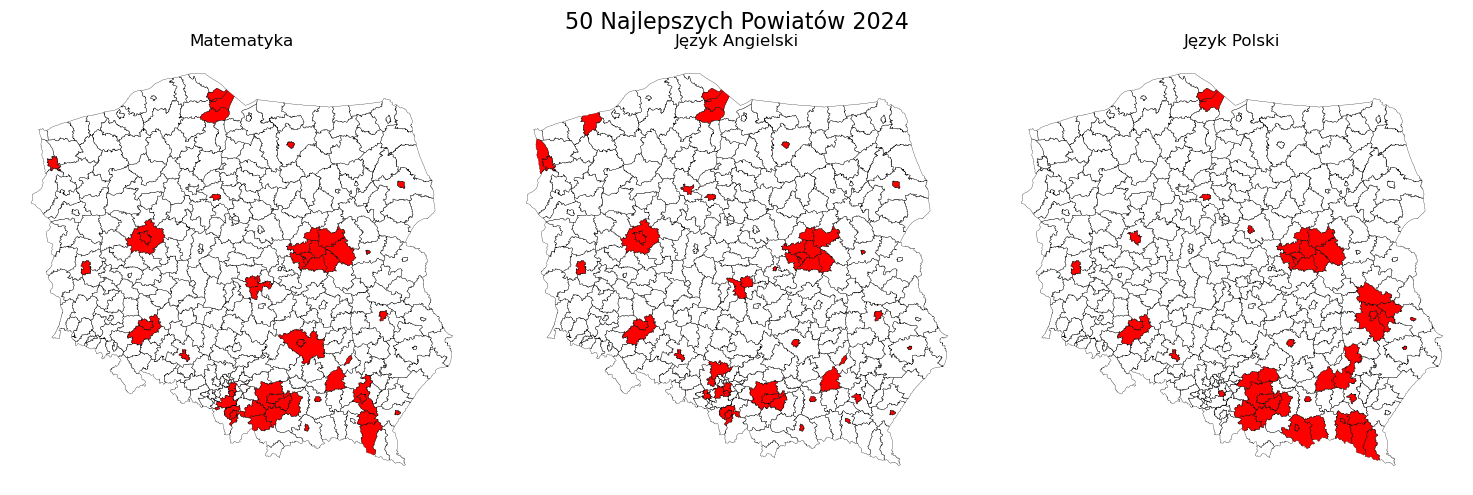

In [16]:
# plot top 50 powiats
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('50 Najlepszych Powiatów 2024', size=16)

# extract highest 50 powiats
top_mat = gdf_mat.sort_values(by='wynik średni (%)', ascending=False).head(50)
top_ang = gdf_ang.sort_values(by='wynik średni (%)', ascending=False).head(50)
top_pol = gdf_pol.sort_values(by='wynik średni (%)', ascending=False).head(50)

axes[0].set_title('Matematyka')
axes[0].axis('off')
top_mat.plot(ax=axes[0], color='red')
gdf_mat.boundary.plot(ax=axes[0], linewidth=0.2, edgecolor='black')

axes[1].set_title('Język Angielski')
axes[1].axis('off')
top_ang.plot(ax=axes[1], color='red')
gdf_ang.boundary.plot(ax=axes[1], linewidth=0.2, edgecolor='black')

axes[2].set_title('Język Polski')
axes[2].axis('off')
top_pol.plot(ax=axes[2], color='red')
gdf_pol.boundary.plot(ax=axes[2], linewidth=0.2, edgecolor='black')

plt.tight_layout()
plt.show()

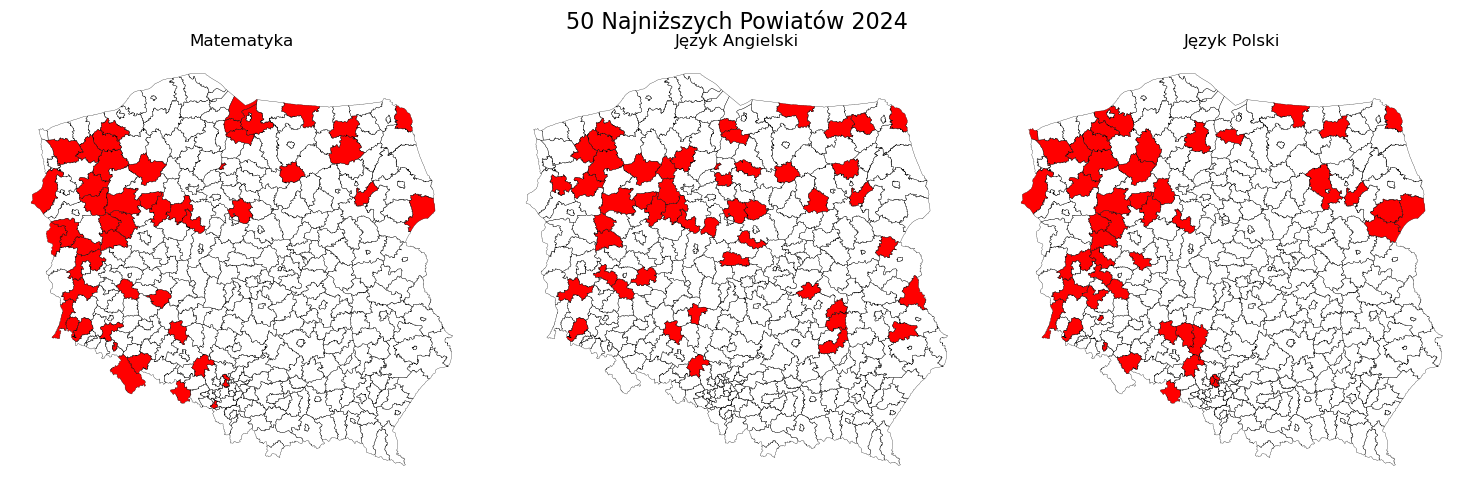

In [17]:
# plot bottom 50 powiats
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('50 Najniższych Powiatów 2024', size=16)

# extract lowest 50 powiats
low_mat = gdf_mat.sort_values(by='wynik średni (%)', ascending=True).head(50)
low_ang = gdf_ang.sort_values(by='wynik średni (%)', ascending=True).head(50)
low_pol = gdf_pol.sort_values(by='wynik średni (%)', ascending=True).head(50)

axes[0].set_title('Matematyka')
axes[0].axis('off')
low_mat.plot(ax=axes[0], color='red')
gdf_mat.boundary.plot(ax=axes[0], linewidth=0.2, edgecolor='black')

axes[1].set_title('Język Angielski')
axes[1].axis('off')
low_ang.plot(ax=axes[1], color='red')
gdf_ang.boundary.plot(ax=axes[1], linewidth=0.2, edgecolor='black')

axes[2].set_title('Język Polski')
axes[2].axis('off')
low_pol.plot(ax=axes[2], color='red')
gdf_pol.boundary.plot(ax=axes[2], linewidth=0.2, edgecolor='black')

plt.tight_layout()
plt.show()

### 4. Conclusion

This notebook displayed a basic way to map the eigth-grade exam results with powiat distribution. The data has been collected from the official CKE website and visualized for three mandatory subjects. The final outputs of this notebook are choropleth maps of Poland with the exam results. It is easy to spot that the highest results are focused around major cities. Lowest exam results tend to repeat in the same powiats located in West & North Poland. We can dive deeper and more specific and plot exam results for each gmina but the CKE data seems to be incomplete.